# Load dataset
The dataset is already tokenized and integer encoded <br>
But the dataset is not padded

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

## Padding

In [3]:
X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding='post')

In [4]:
X_train.shape

(25000, 2494)

# Create model

In [5]:
model = Sequential()
model.add(Embedding(10000, 50, input_length=2))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.name = 'rnn_sentiment_analysis'
model.summary()

Model: "rnn_sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test)).history

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 190ms/step - accuracy: 0.5011 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 211s 203ms/step - accuracy: 0.4951 - loss: 0.6941 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 202ms/step - accuracy: 0.4972 - loss: 0.7061 - val_accuracy: 0.4994 - val_loss: 0.6946
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 202ms/step - accuracy: 0.5042 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.4985 - loss: 0.6941 - val_accuracy: 0.4978 - val_loss: 0.6955


# Evaluate model performance

In [8]:
import matplotlib.pyplot as plt

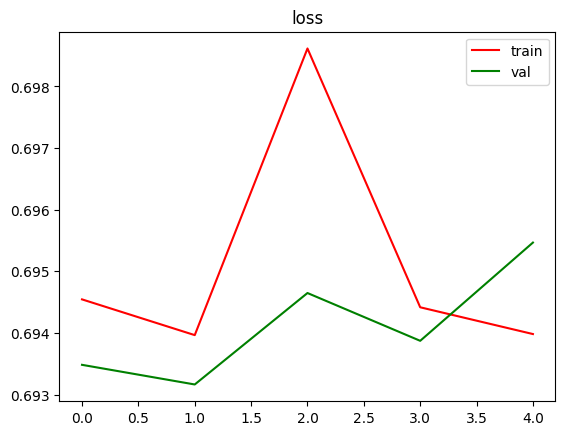

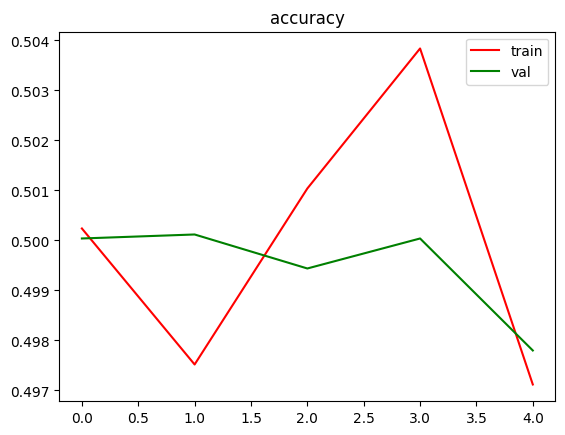

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(history['loss'], label='train', color='red')
plt.plot(history['val_loss'], label='val', color='green')
plt.title('loss')
plt.legend()
plt.show()
plt.savefig('loss.png')

plt.plot(history['accuracy'], label='train', color='red')
plt.plot(history['val_accuracy'], label='val', color='green')
plt.title('accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy.png')

# Check accuracy

In [ ]:
pred = model.predict(X_test)
pred = np.where(pred>=0.5,1,0)

In [10]:
from sklearn.metrics import accuracy_score

ImportError: cannot import name 'accuracy' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
accuracy_score(y_test, pred)